# Which tree species should the city plant? #
![IMAGE][def2]
Photo by <a href="https://unsplash.com/@adwow?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Andy</a> on <a href="https://unsplash.com/s/photos/trees-manhattan?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
 [def2]:andy-1jyxYe7sw4E-unsplash.jpg



## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [108]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio 
import plotly.figure_factory as ff
trees = pd.read_csv('data/trees.csv')
trees.head(5)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
0,190422,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,9,OnCurb,American linden,Alive,Good,No,Yes,No,No,No,No,No,No,No,10019,MN15,Clinton,40.762724,-73.987297
3,193310,14,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,Yes,No,No,Yes,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456
4,199760,4,OnCurb,willow oak,Alive,Fair,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782087,-73.980964


In [107]:
fig = ff.create_hexbin_mapbox(
    data_frame=trees, lat="latitude", lon="longitude",
    nx_hexagon=18, opacity=0.6, labels={"color": "Trees"},
    center=dict(lat=40.79, lon=-73.97),
    min_count=1,
    color_continuous_scale='inferno',
    zoom=10.4,
    title='Where are the city trees?',
    height=670,
    mapbox_style="carto-darkmatter",
    agg_func=np.sum
)

fig.update_coloraxes(colorbar_ticklabelposition='inside')
fig.update_coloraxes(colorbar_ticks='inside')
fig.show()

In [81]:
big_trees = trees.sort_values(by = 'tree_dbh', ascending=False)
big_trees.head(10)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
28786,476317,318,OnCurb,pin oak,Alive,Good,No,No,No,No,No,No,No,No,No,10033,MN35,Washington Heights North,40.850879,-73.943067
17428,304388,228,OnCurb,Callery pear,Alive,Fair,No,No,No,No,No,No,No,No,Yes,10026,MN11,Central Harlem South,40.802178,-73.948116
60419,176434,199,OnCurb,willow oak,Alive,Good,Yes,No,No,No,No,No,No,No,No,10010,MN21,Gramercy,40.738028,-73.981496
18093,312545,120,OnCurb,willow oak,Alive,Good,Yes,No,No,No,No,No,No,No,No,10032,MN36,Washington Heights South,40.843756,-73.937922
21864,312202,109,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10032,MN04,Hamilton Heights,40.830994,-73.943261
17437,277770,88,OnCurb,Callery pear,Alive,Good,No,No,No,No,No,No,No,No,No,10007,MN25,Battery Park City-Lower Manhattan,40.717307,-74.013326
18410,296329,74,OnCurb,ginkgo,Alive,Good,No,No,No,No,No,No,No,No,No,10021,MN40,Upper East Side-Carnegie Hill,40.768142,-73.962694
59686,151093,62,OffsetFromCurb,American elm,Alive,Good,No,No,No,No,No,No,No,No,No,10032,MN36,Washington Heights South,40.837050,-73.939971
29599,523306,54,OffsetFromCurb,silver linden,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN09,Morningside Heights,40.799399,-73.973228
29967,523465,52,OffsetFromCurb,American elm,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN09,Morningside Heights,40.805824,-73.968232


In [82]:
tree_trunk = trees.groupby(['spc_common'])['tree_dbh'].agg(['count','mean','median','max','min'])
tree_trunk = tree_trunk.sort_values(by='median',ascending=False)
tree_trunk = tree_trunk[tree_trunk['count'] > 500]
tree_trunk = tree_trunk.reset_index()
tree_trunk.head(10)

,spc_common,count,mean,median,max,min
0,London planetree,4122,13.168607,13.0,48,1
1,American elm,1698,13.899293,12.0,62,1
2,willow oak,889,10.811024,10.0,199,1
3,Sophora,4453,9.225915,9.0,38,1
4,honeylocust,13176,9.058060,9.0,109,0
5,green ash,770,9.255844,9.0,28,0
6,pin oak,4584,10.068499,9.0,318,1
7,ginkgo,5859,8.445981,8.0,74,1
8,Callery pear,7297,8.681376,8.0,228,1
9,littleleaf linden,3333,7.867087,7.0,40,0


In [83]:
px.box(
    trees,
    x='spc_common',
    y='tree_dbh'
)

In [84]:
#tree_count = trees.groupby(['spc_common','health'])['health'].agg('count')
tree_count = trees.groupby(['spc_common','health'])['spc_common'].agg('count')

#print(tree_count.value_counts(normalize=True))
tree_count = tree_count.unstack()
tree_count = tree_count.fillna(0)
tree_count['Total'] = tree_count.sum(axis='columns')
tree_count = tree_count.sort_values(by='Total',ascending=False)
tree_count = tree_count.reset_index()
tree_count.head(11)

health,spc_common,Fair,Good,Poor,Total
0,honeylocust,2012.0,10958.0,205.0,13175.0
1,Callery pear,1474.0,5382.0,441.0,7297.0
2,ginkgo,982.0,4386.0,491.0,5859.0
3,pin oak,719.0,3731.0,134.0,4584.0
4,Sophora,713.0,3554.0,186.0,4453.0
5,London planetree,1144.0,2597.0,381.0,4122.0
6,Japanese zelkova,619.0,2773.0,204.0,3596.0
7,littleleaf linden,796.0,2076.0,461.0,3333.0
8,American elm,259.0,1361.0,78.0,1698.0
9,American linden,379.0,1020.0,184.0,1583.0


In [85]:
tmp_tree = tree_trunk.head(10)['spc_common']

#print(tmp_tree.values)
fat_tree = pd.DataFrame()
for tree in tmp_tree:
    sel_tree = trees.loc[trees['spc_common'] == tree]
    fat_tree = pd.concat([fat_tree,sel_tree])


#fat_tree = trees.loc[trees['spc_common'] in tmp_tree.values]

fat_tree.head(10)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
10,208346,20,OffsetFromCurb,London planetree,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782587,-73.974840
11,178382,12,OnCurb,London planetree,Alive,Fair,No,No,No,No,No,No,No,No,No,10009,MN50,Stuyvesant Town-Cooper Village,40.733716,-73.977058
13,208230,13,OffsetFromCurb,London planetree,Alive,Fair,No,No,No,No,No,Yes,No,No,No,10024,MN12,Upper West Side,40.782181,-73.972390
18,196373,13,OnCurb,London planetree,Alive,Good,No,No,No,No,No,No,No,No,No,10002,MN27,Chinatown,40.716805,-73.991573
19,190359,13,OnCurb,London planetree,Alive,Fair,No,No,Yes,No,No,Yes,No,No,Yes,10021,MN40,Upper East Side-Carnegie Hill,40.772224,-73.958944
21,208373,4,OnCurb,London planetree,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.781617,-73.975585
22,208240,2,OffsetFromCurb,London planetree,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782339,-73.972763
24,196372,12,OnCurb,London planetree,Alive,Good,No,No,No,No,No,No,No,No,No,10002,MN27,Chinatown,40.716883,-73.991533
25,209919,9,OnCurb,London planetree,Alive,Good,No,No,No,No,No,No,No,No,No,10027,MN09,Morningside Heights,40.808812,-73.963315
26,208338,5,OnCurb,London planetree,Alive,Fair,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782834,-73.974699


In [86]:
px.box(
    fat_tree,
    x='spc_common',
    y='tree_dbh',

    )

In [87]:

fig = px.bar(
    tree_count.head(11),
    x='spc_common',
    y=['Good','Fair','Poor'],
    text_auto=False,
    title='The health of the most popular trees'
    )
fig.update_layout(yaxis_title='Number of trees', xaxis_title='', showlegend=True, legend_title='Health')
fig.show()

In [88]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX63,West Concourse,1.936954e+07,28550.700370,"POLYGON ((-73.91192 40.84326, -73.91194 40.843..."
191,4.0,Queens,081,QN17,Forest Hills,5.782845e+07,36183.607828,"POLYGON ((-73.83103 40.71434, -73.83115 40.714..."
192,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.116850e+08,490146.604020,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ..."
193,4.0,Queens,081,QN03,Springfield Gardens South-Brookville,4.326375e+07,45266.267875,"POLYGON ((-73.75763 40.66645, -73.75756 40.666..."


In [89]:
grp_trees = trees.groupby('nta')['nta_name'].agg(['count'])
#grp_trees = grp_trees.reset_index()
#grp_trees.columns=['Count','sum']
#print(grp_trees)
df_merged = neighborhoods.merge(grp_trees, #map_df merge to df
 left_on=['ntacode'], 
 right_on=['nta'])
df_merged = df_merged.set_index('ntaname')
#df_merged.head(5)

(-74.02497712378731, -73.90101641785236, 40.6848206354211, 40.888286494965826)

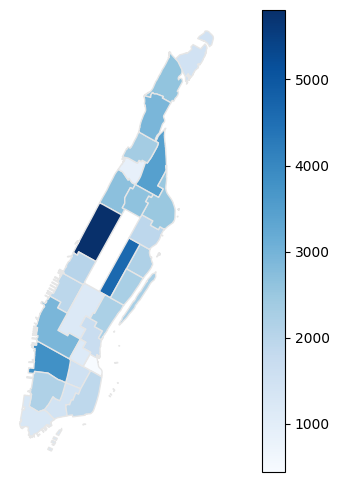

In [90]:
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged.plot(column='count', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

In [106]:

fig = px.choropleth_mapbox(df_merged,
                           geojson=eval(df_merged['geometry'].to_json()),
                           locations=df_merged.index,
                           center=dict(lat=40.79, lon=-73.97),
                           mapbox_style="carto-positron",
                           zoom=10.4,
                           color='count',
                           labels=dict(color = "Trees"),
                           opacity=0.9,
                           height=670,
                           title='Neighborhood tree count',
                           color_continuous_scale='algae',
                           )
#fig.update_geos(fitbounds="geojson", visible=True)                           
fig.show()

## 💪 Challenge
Create a report that covers the following:
* What are the most common tree species in Manhattan?
* Which are the neighborhoods with the most trees?
* A visualization of Manhattan's neighborhoods and tree locations.
* What ten tree species would you recommend the city plant in the future?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 85%       | <ul><li> Accuracy (30%) - The response must be representative of the original data and free from errors.</li><li> Clarity (25%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (30%) - The response must be a full report that responds to the questions posed.</li></ul>       |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, earlier submission time will be used as a tie-breaker. 

## 📘 Rules
To be eligible to win, you must:
* Submit your response before the deadline. 
All responses must be submitted in English.

Entrants must be:
* 18+ years old.
* Allowed to take part in a skill-based competition from their country.
Entrants can not:
* Be in a country currently sanctioned by the U.S. government.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!